### Mean shift filter used for "smoothing" thin section fractures

In [6]:
import ipywidgets as wd
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import hed

In [7]:
def applyBlur(img, sp=20, sr=50):
    meanshift = cv2.pyrMeanShiftFiltering(img,sp=sp,sr=sr)    
    return meanshift


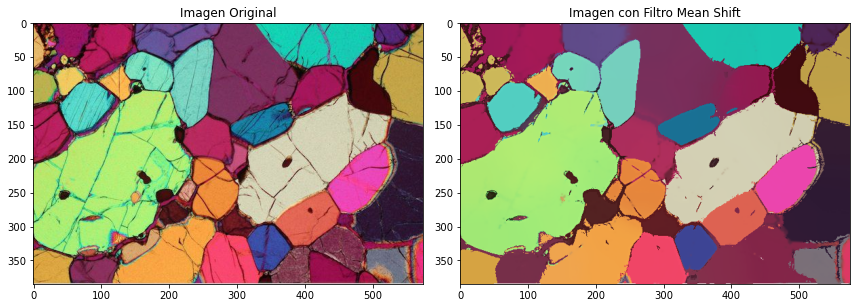

In [9]:
img = cv2.imread("../data/imgs/olivino.jpg",1)
final = applyBlur(img, 40, 70)
hed.graphImgs([img[:,:,::-1], final[:,:,::-1]], ["Imagen Original", "Imagen con Filtro Mean Shift"])

### Detecting borders on image with applied mean shift filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


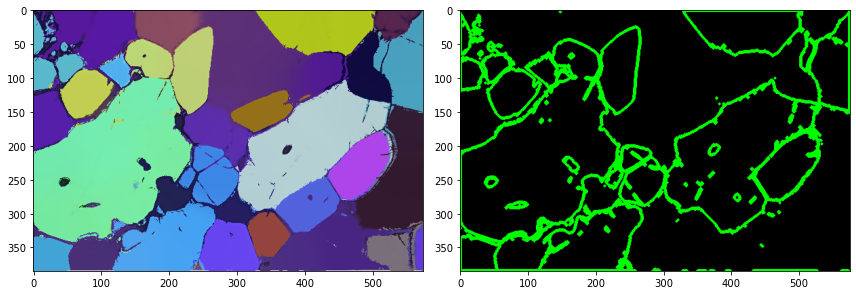

In [4]:


imgray = cv2.cvtColor(final, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(final.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
cv2.imwrite("contornos1.jpg",img_contours)

hed.graphImgs([final, img_contours])